In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn

In [2]:
pwd()

'C:\\Users\\yurit\\Documents\\GitHub\\fun-ml-projects\\Tabular'

In [69]:
train = pd.read_csv("../../Data/titanic/train.csv")
test = pd.read_csv("../../Data/titanic/test.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape

(891, 12)

<AxesSubplot:>

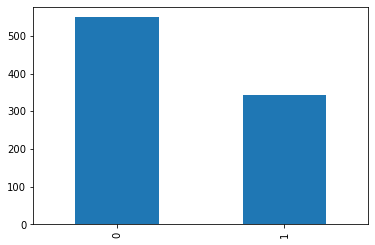

In [72]:
train['Survived'].value_counts().plot.bar()

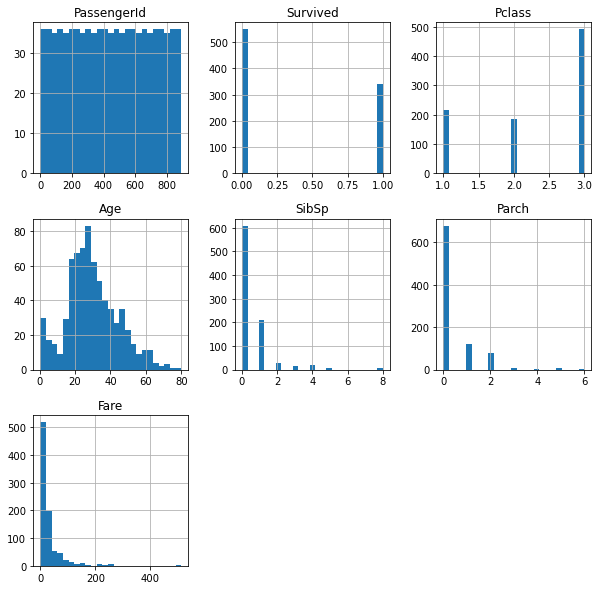

In [13]:
train.hist(bins=25,figsize=(10,10))
plt.show()

In [14]:
np.random.seed(42)

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train, train['Survived']):
    train_train = train.loc[train_index]
    train_test = train.loc[test_index]

In [33]:
train_train['Survived'].value_counts() / len(train_train)

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [34]:
train['Survived'].value_counts() / len(train)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

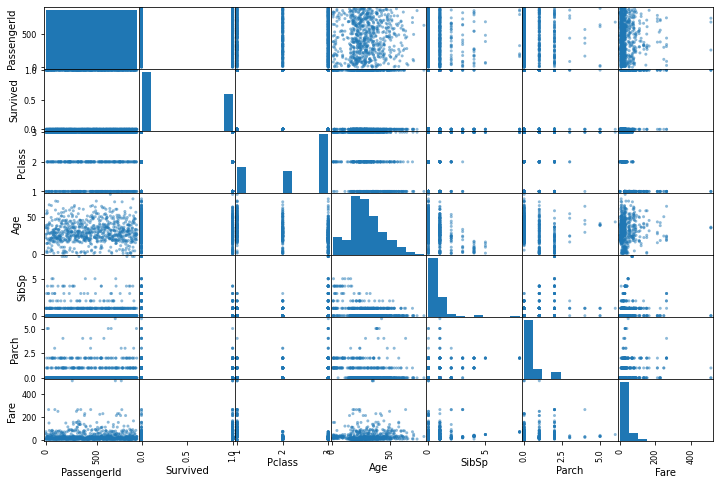

In [36]:
from pandas.plotting import scatter_matrix

scatter_matrix(train, figsize=(12,8))
plt.show()

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
df = train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [78]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [79]:
numeric_cols = ['Age','SibSp','Parch','Fare']
cat_cols = ['Pclass','Sex','Embarked']

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [81]:
num_pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
    ]
)

In [82]:
full_pipeline = ColumnTransformer(
    [
        ("num", num_pipeline, numeric_cols),
        ("cat", OneHotEncoder(), cat_cols)
    ]
)

In [83]:
X_prepared = full_pipeline.fit_transform(X)

### Model

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dec_tree = DecisionTreeClassifier(random_state=42)

In [86]:
dec_tree.fit(X_prepared,y)

DecisionTreeClassifier(random_state=42)

In [87]:
titanic_predictions = dec_tree.predict(X_prepared)

In [88]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [89]:
accuracy_score(y_true=y, y_pred=titanic_predictions)

0.9797979797979798

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
scores = cross_val_score(dec_tree, X_prepared, y, cv=10)

In [92]:
scores

array([0.78888889, 0.83146067, 0.73033708, 0.78651685, 0.82022472,
       0.78651685, 0.80898876, 0.71910112, 0.83146067, 0.80898876])

In [93]:
scores.mean()

0.7912484394506867

In [94]:
scores.std()

0.03697145249699676

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

In [125]:
scores = cross_val_score(rand_forest, X_prepared, y, cv=10, scoring='f1_macro')
print(scores)
print(f'mean score = {scores.mean()}')
print(f'std dev = {scores.std()}')

[0.78178879 0.80985615 0.7337986  0.89349821 0.86671205 0.77372881
 0.7954023  0.73946136 0.85150167 0.8182437 ]
mean score = 0.8063991639621664
std dev = 0.04995581157830404


In [126]:
rand_forest.fit(X_prepared,y)

RandomForestClassifier(max_depth=5, random_state=42)

In [127]:
forest_predictions = rand_forest.predict(X_prepared)

In [128]:
accuracy_score(y_true=y, y_pred=forest_predictions)

0.8484848484848485

In [129]:
f1_score(y_true=y, y_pred=forest_predictions)

0.7804878048780487

In [130]:
confusion_matrix(y_true=y, y_pred=forest_predictions)

array([[516,  33],
       [102, 240]], dtype=int64)

In [109]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Grid Search

In [113]:
from sklearn.model_selection import GridSearchCV

In [117]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

rand_forest = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rand_forest, 
    param_grid=param_grid,
    cv=5,
    return_train_score=True
)
grid_search.fit(X_prepared,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [118]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 10}

In [119]:
grid_search.best_estimator_

RandomForestClassifier(max_features=8, n_estimators=10, random_state=42)

In [120]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7632163705982047 {'max_features': 2, 'n_estimators': 3}
0.8013684012303057 {'max_features': 2, 'n_estimators': 10}
0.8069675475488042 {'max_features': 2, 'n_estimators': 30}
0.7901261691042621 {'max_features': 4, 'n_estimators': 3}
0.8137530600715588 {'max_features': 4, 'n_estimators': 10}
0.8114870378507313 {'max_features': 4, 'n_estimators': 30}
0.8003075764233255 {'max_features': 6, 'n_estimators': 3}
0.8047391877471597 {'max_features': 6, 'n_estimators': 10}
0.8069989328981231 {'max_features': 6, 'n_estimators': 30}
0.7923921913250893 {'max_features': 8, 'n_estimators': 3}
0.8181909484652564 {'max_features': 8, 'n_estimators': 10}
0.8125980792166217 {'max_features': 8, 'n_estimators': 30}
0.7744460485845207 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.7923984683949532 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.7811687904086373 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.8036155922415416 {'bootstrap': False, 'max_features': 3, 'n

In [122]:
pd.DataFrame(grid_search.cv_results_).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006911,0.005353,0.000998,0.000003,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",0.737430,0.752809,...,0.763216,0.032982,18,0.942416,0.939691,0.931276,0.943899,0.939691,0.939395,0.004370
1,0.008607,0.000471,0.001000,0.000019,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",0.782123,0.775281,...,0.801368,0.024830,9,0.969101,0.966339,0.963534,0.963534,0.960729,0.964648,0.002847
